In [ ]:
!pip install ydata-profiling
!pip install umap-learn # Install the umap-learn library

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from tqdm.auto import tqdm

# Progress tracking
from tqdm.auto import tqdm

# Data profiling
from ydata_profiling import profile_report # Now this import should work

# Dimensionality reduction
import umap # Now this import should work
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

encoder_ord = OrdinalEncoder()
# Data preprocessing and modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, auc , roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from imblearn.combine import SMOTEENN


# Setting up plotting to be displayed inline
# %matplotlib inline

# Initialize label encoder, standard scaler, and one-hot encoder
lb = LabelEncoder()
sc = StandardScaler()
onehot = OneHotEncoder()

In [ ]:
df = pd.read_csv('/content/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df.drop(['Formatted Date',
       'Apparent Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover','Daily Summary'],axis=1,inplace=True)
df

,Summary,Precip Type,Temperature (C),Humidity,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,1015.13
1,Partly Cloudy,rain,9.355556,0.86,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,1015.94
3,Partly Cloudy,rain,8.288889,0.83,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,1016.51
...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,1015.95


In [ ]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
df = df[df['Precip Type']!='snow'].reset_index()
df

,index,Summary,Precip Type,Temperature (C),Humidity,Pressure (millibars)
0,0,Partly Cloudy,rain,9.472222,0.89,1015.13
1,1,Partly Cloudy,rain,9.355556,0.86,1015.63
2,2,Mostly Cloudy,rain,9.377778,0.89,1015.94
3,3,Partly Cloudy,rain,8.288889,0.83,1016.41
4,4,Mostly Cloudy,rain,8.755556,0.83,1016.51
...,...,...,...,...,...,...
85736,96448,Partly Cloudy,rain,26.016667,0.43,1014.36
85737,96449,Partly Cloudy,rain,24.583333,0.48,1015.16
85738,96450,Partly Cloudy,rain,22.038889,0.56,1015.66
85739,96451,Partly Cloudy,rain,21.522222,0.60,1015.95


In [ ]:
df['Precip Type'].fillna('no rain', inplace=True)

In [ ]:
df.Humidity = df.Humidity * 100

In [ ]:
df.drop(columns='index',inplace=True)

In [ ]:
df

,Summary,Precip Type,Temperature (C),Humidity,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,89.0,1015.13
1,Partly Cloudy,rain,9.355556,86.0,1015.63
2,Mostly Cloudy,rain,9.377778,89.0,1015.94
3,Partly Cloudy,rain,8.288889,83.0,1016.41
4,Mostly Cloudy,rain,8.755556,83.0,1016.51
...,...,...,...,...,...
85736,Partly Cloudy,rain,26.016667,43.0,1014.36
85737,Partly Cloudy,rain,24.583333,48.0,1015.16
85738,Partly Cloudy,rain,22.038889,56.0,1015.66
85739,Partly Cloudy,rain,21.522222,60.0,1015.95


In [ ]:
df.rename(columns={'Precip Type': 'Rain'}, inplace=True)

In [ ]:
df

,Summary,Rain,Temperature (C),Humidity,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,89.0,1015.13
1,Partly Cloudy,rain,9.355556,86.0,1015.63
2,Mostly Cloudy,rain,9.377778,89.0,1015.94
3,Partly Cloudy,rain,8.288889,83.0,1016.41
4,Mostly Cloudy,rain,8.755556,83.0,1016.51
...,...,...,...,...,...
85736,Partly Cloudy,rain,26.016667,43.0,1014.36
85737,Partly Cloudy,rain,24.583333,48.0,1015.16
85738,Partly Cloudy,rain,22.038889,56.0,1015.66
85739,Partly Cloudy,rain,21.522222,60.0,1015.95


In [ ]:
df['Rain'].replace('rain', 1, inplace=True)
df['Rain'].replace('no rain', 0, inplace=True)
df['Rain'] = df['Rain'].astype(int)

In [ ]:
df

,Summary,Rain,Temperature (C),Humidity,Pressure (millibars)
0,Partly Cloudy,1,9.472222,89.0,1015.13
1,Partly Cloudy,1,9.355556,86.0,1015.63
2,Mostly Cloudy,1,9.377778,89.0,1015.94
3,Partly Cloudy,1,8.288889,83.0,1016.41
4,Mostly Cloudy,1,8.755556,83.0,1016.51
...,...,...,...,...,...
85736,Partly Cloudy,1,26.016667,43.0,1014.36
85737,Partly Cloudy,1,24.583333,48.0,1015.16
85738,Partly Cloudy,1,22.038889,56.0,1015.66
85739,Partly Cloudy,1,21.522222,60.0,1015.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85741 entries, 0 to 85740
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Summary               85741 non-null  object 
 1   Rain                  85741 non-null  int64  
 2   Temperature (C)       85741 non-null  float64
 3   Humidity              85741 non-null  float64
 4   Pressure (millibars)  85741 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
df['Summary'].value_counts()

,count
Summary,
Partly Cloudy,30013
Mostly Cloudy,26208
Overcast,13997
Clear,9498
Foggy,4166
Breezy and Mostly Cloudy,490
Breezy and Overcast,472
Breezy and Partly Cloudy,379
Dry and Partly Cloudy,86


In [ ]:
indices_to_remove   = df.groupby('Summary').filter(lambda x: len(x) < 4166).index
df = df.drop(indices_to_remove)

In [48]:
Summary_Label_counts= df['Summary'].value_counts()
fig1 = px.pie(names= Summary_Label_counts.keys(), values= Summary_Label_counts.values, title='Summary Label Distribution')
fig1.show()

In [ ]:
len(df)

83882

In [ ]:
# Data Balancing
from scipy.stats import uniform ,randint

sm = SMOTEENN()

In [ ]:
balanced_data, balanced_labels = sm.fit_resample(df.drop(columns=['Summary']), df['Summary'])

# Convert balanced data to DataFrame
df = pd.DataFrame(balanced_data, columns=df.drop(columns=['Summary']).columns)

# Add the 'Summary' column back to the balanced DataFrame
df['Summary'] = balanced_labels
df

,Rain,Temperature (C),Humidity,Pressure (millibars),Summary
0,1,10.555556,95.0,1015.83,Clear
1,1,10.911111,99.0,1018.62,Clear
2,1,14.838889,82.0,1019.08,Clear
3,1,12.711111,89.0,1020.11,Clear
4,1,11.811111,84.0,1018.38,Clear
...,...,...,...,...,...
53765,1,27.800000,32.0,1014.04,Partly Cloudy
53766,1,30.894444,28.0,1014.66,Partly Cloudy
53767,1,31.083333,28.0,1014.17,Partly Cloudy
53768,1,31.083333,28.0,1013.97,Partly Cloudy


In [47]:
Summary_Label_counts= df['Summary'].value_counts()
fig1 = px.pie(names= Summary_Label_counts.keys(), values= Summary_Label_counts.values, title='Summary Label Distribution')
fig1.show()

In [ ]:
label_encoder = LabelEncoder()
df['Summary'] = label_encoder.fit_transform(df['Summary'])

In [ ]:
df

,Rain,Temperature (C),Humidity,Pressure (millibars),Summary
0,1,10.555556,95.0,1015.83,0
1,1,10.911111,99.0,1018.62,0
2,1,14.838889,82.0,1019.08,0
3,1,12.711111,89.0,1020.11,0
4,1,11.811111,84.0,1018.38,0
...,...,...,...,...,...
53765,1,27.800000,32.0,1014.04,4
53766,1,30.894444,28.0,1014.66,4
53767,1,31.083333,28.0,1014.17,4
53768,1,31.083333,28.0,1013.97,4


In [ ]:
X = df.drop(columns=['Summary'])
y = df['Summary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43016, 4)
y_train shape: (43016,)
X_test shape: (10754, 4)
y_test shape: (10754,)


In [ ]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

  0%|          | 0/8 [00:00<?, ?it/s]

Random Forest
****************************************************************************************************

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END model__max_depth=None, model__n_estimators=50;, score=0.896 total time=   8.3s
[CV 2/2] END model__max_depth=None, model__n_estimators=50;, score=0.898 total time=   4.9s
[CV 1/2] END model__max_depth=None, model__n_estimators=100;, score=0.898 total time=  12.3s
[CV 2/2] END model__max_depth=None, model__n_estimators=100;, score=0.900 total time=  13.8s
[CV 1/2] END model__max_depth=None, model__n_estimators=200;, score=0.899 total time=  14.6s
[CV 2/2] END model__max_depth=None, model__n_estimators=200;, score=0.900 total time=  12.2s
[CV 1/2] END model__max_depth=10, model__n_estimators=50;, score=0.791 total time=   1.9s
[CV 2/2] END model__max_depth=10, model__n_estimators=50;, score=0.801 total time=   1.9s
[CV 1/2] END model__max_depth=10, model__n_estimators=100;, score=0.793 total time=   5.

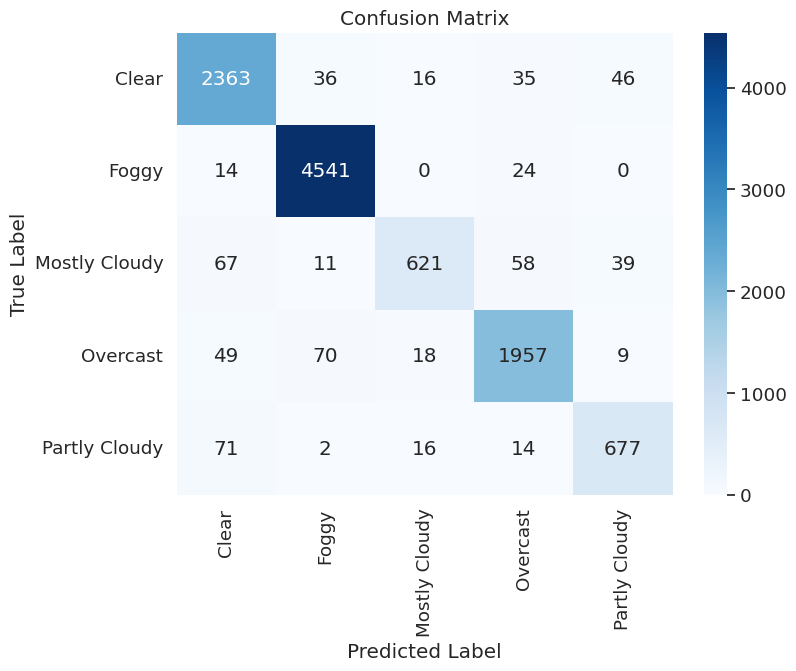

Gradient Boosting
****************************************************************************************************

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=50;, score=0.743 total time=   9.8s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=50;, score=0.738 total time=  10.4s
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=100;, score=0.749 total time=  19.3s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=100;, score=0.748 total time=  18.6s
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=200;, score=0.761 total time=  37.9s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=200;, score=0.761 total time=  39.0s
[CV 1/2] END model__learning_rate=0.1, model__n_estimators=50;, score=0.748 total time=   8.8s
[CV 2/2] END model__learning_rate=0.1, model__n_estimators=50;, score=0.747 total time=  10.0s
[CV 1/2] END model__learning_rate=0.1, model__n_es

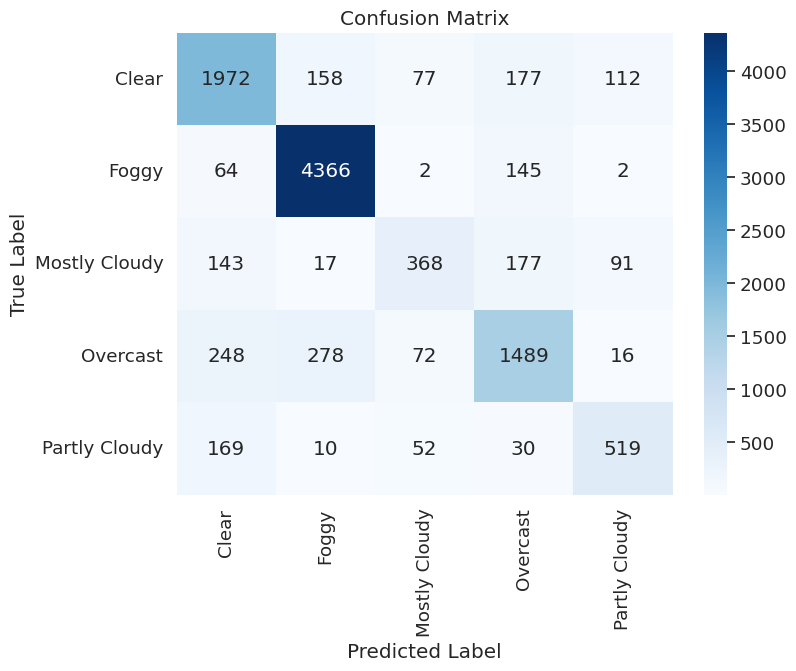

Support Vector Machine
****************************************************************************************************

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ..model__C=0.1, model__gamma=scale;, score=0.510 total time= 1.3min
[CV 1/2] END ...model__C=0.1, model__gamma=auto;, score=0.746 total time= 1.2min
[CV 2/2] END ...model__C=0.1, model__gamma=auto;, score=0.739 total time= 1.2min
[CV 1/2] END ....model__C=1, model__gamma=scale;, score=0.607 total time=  57.8s
[CV 2/2] END ....model__C=1, model__gamma=scale;, score=0.607 total time= 1.0min
[CV 1/2] END .....model__C=1, model__gamma=auto;, score=0.827 total time=  45.9s
[CV 2/2] END .....model__C=1, model__gamma=auto;, score=0.825 total time=  50.8s
[CV 1/2] END ...model__C=10, model__gamma=scale;, score=0.677 total time=  45.1s
[CV 2/2] END ...model__C=10, model__gamma=scale;, score=0.669 total time=  47.1s
[CV 1/2] END ....model__C=10, model__gamma=auto;, score=0.878 total time=  40.1s
[CV 2

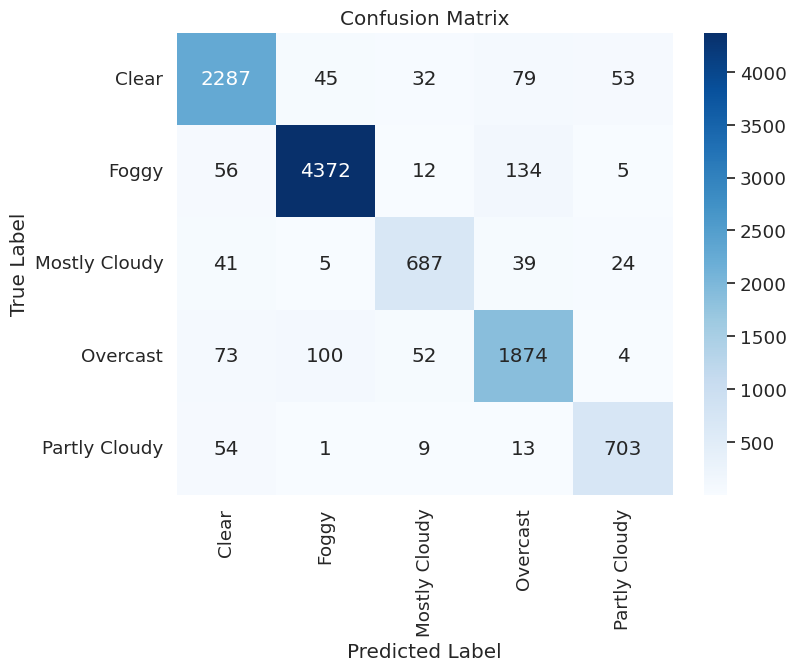

Logistic Regression
****************************************************************************************************

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .....model__C=0.1, model__penalty=l1;, score=nan total time=   0.0s
[CV 2/2] END .....model__C=0.1, model__penalty=l1;, score=nan total time=   0.0s
[CV 1/2] END ...model__C=0.1, model__penalty=l2;, score=0.577 total time=   0.7s
[CV 2/2] END ...model__C=0.1, model__penalty=l2;, score=0.561 total time=   1.2s
[CV 1/2] END .......model__C=1, model__penalty=l1;, score=nan total time=   0.0s
[CV 2/2] END .......model__C=1, model__penalty=l1;, score=nan total time=   0.0s
[CV 1/2] END .....model__C=1, model__penalty=l2;, score=0.563 total time=   1.3s
[CV 2/2] END .....model__C=1, model__penalty=l2;, score=0.552 total time=   1.4s
[CV 1/2] END ......model__C=10, model__penalty=l1;, score=nan total time=   0.0s
[CV 2/2] END ......model__C=10, model__penalty=l1;, score=nan total time=   0.0s
[CV 1/2]

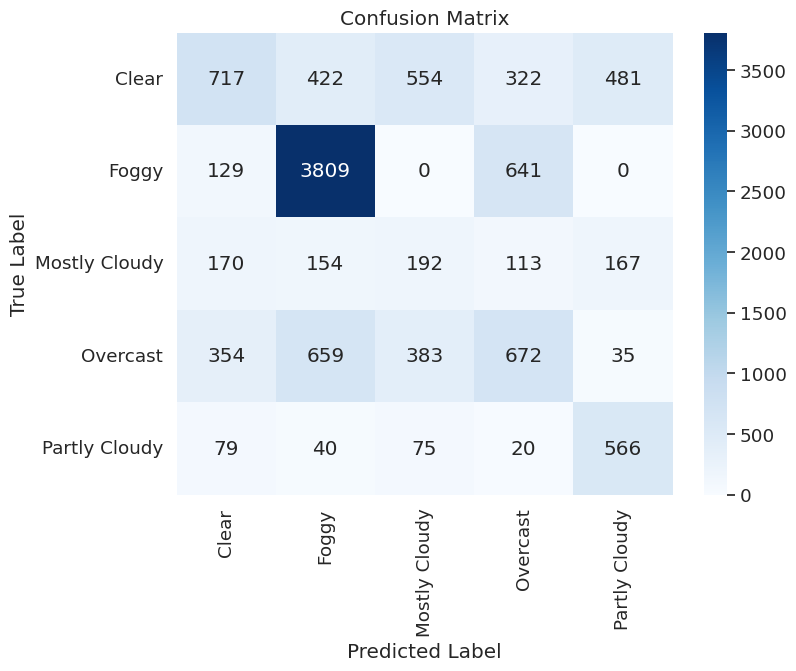

Decision Tree
****************************************************************************************************

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END model__max_depth=None, model__min_samples_split=2;, score=0.857 total time=   0.2s
[CV 2/2] END model__max_depth=None, model__min_samples_split=2;, score=0.857 total time=   0.1s
[CV 1/2] END model__max_depth=None, model__min_samples_split=5;, score=0.842 total time=   0.1s
[CV 2/2] END model__max_depth=None, model__min_samples_split=5;, score=0.842 total time=   0.1s
[CV 1/2] END model__max_depth=None, model__min_samples_split=10;, score=0.826 total time=   0.1s
[CV 2/2] END model__max_depth=None, model__min_samples_split=10;, score=0.823 total time=   0.1s
[CV 1/2] END model__max_depth=10, model__min_samples_split=2;, score=0.774 total time=   0.1s
[CV 2/2] END model__max_depth=10, model__min_samples_split=2;, score=0.777 total time=   0.1s
[CV 1/2] END model__max_depth=10, model__min_samples_split

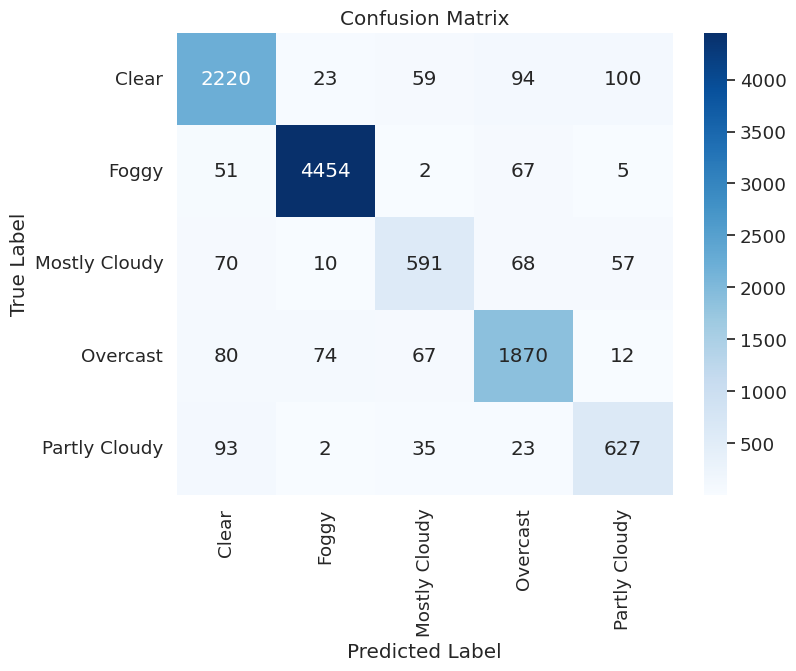

Ada Boost
****************************************************************************************************

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=50;, score=0.643 total time=   1.4s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=50;, score=0.641 total time=   1.4s
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=100;, score=0.683 total time=   3.5s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=100;, score=0.678 total time=   2.6s
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=200;, score=0.688 total time=   4.9s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=200;, score=0.677 total time=   5.9s
[CV 1/2] END model__learning_rate=0.1, model__n_estimators=50;, score=0.684 total time=   1.8s
[CV 2/2] END model__learning_rate=0.1, model__n_estimators=50;, score=0.678 total time=   2.0s
[CV 1/2] END model__learning_rate=0.1, model__n_estimators

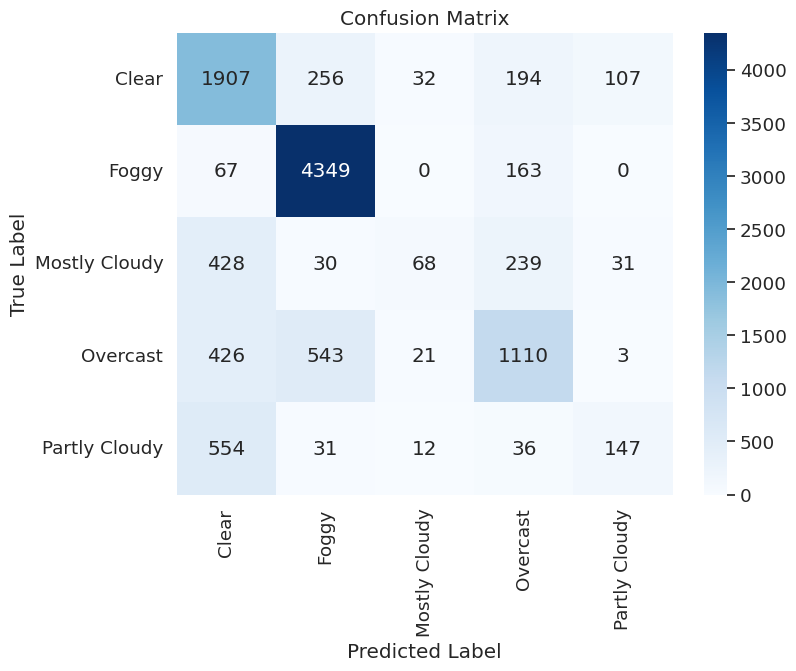

XG Boost
****************************************************************************************************

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=50;, score=0.756 total time=   1.2s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=50;, score=0.755 total time=   0.8s
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=100;, score=0.767 total time=   1.5s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=100;, score=0.768 total time=   1.5s
[CV 1/2] END model__learning_rate=0.05, model__n_estimators=200;, score=0.782 total time=   2.8s
[CV 2/2] END model__learning_rate=0.05, model__n_estimators=200;, score=0.785 total time=   2.8s
[CV 1/2] END model__learning_rate=0.1, model__n_estimators=50;, score=0.769 total time=   2.4s
[CV 2/2] END model__learning_rate=0.1, model__n_estimators=50;, score=0.769 total time=   2.2s
[CV 1/2] END model__learning_rate=0.1, model__n_estimators=

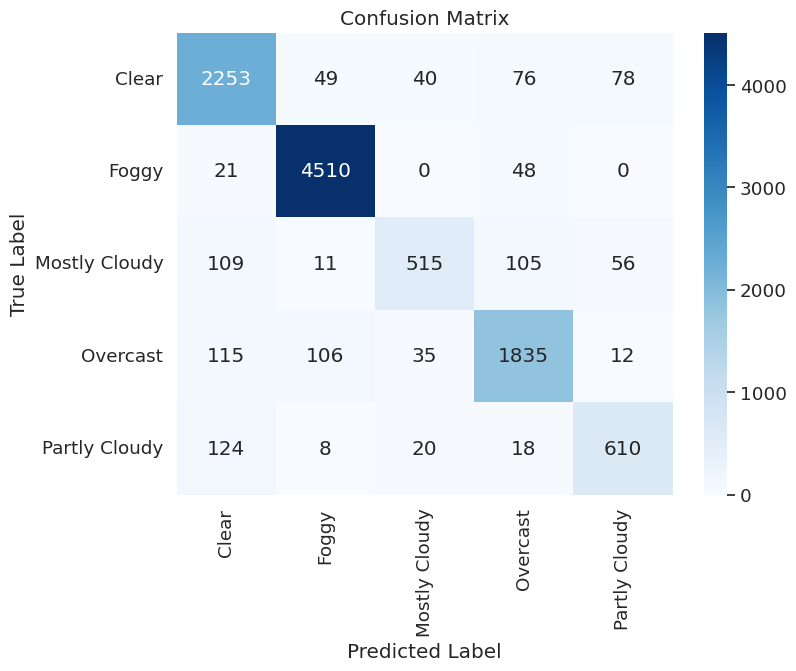

Naive Bayes
****************************************************************************************************

Training : 
Testing : 
Model: Naive Bayes
Test Accuracy: 0.603
Precision: 0.63
Recall: 0.603
Confusion Matrix:
 [[ 371  220   33  776 1096]
 [ 107 4270    0  202    0]
 [  11   47   10  357  371]
 [  38  651   25 1145  244]
 [   2   38    3   49  688]]



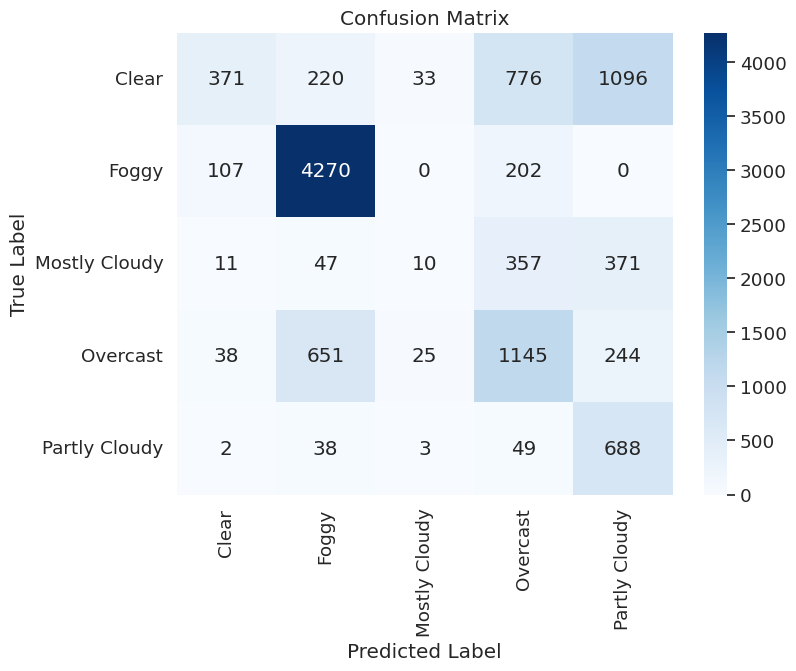

Best Model:
Test Accuracy: 0.9446717500464943
Model Pipeline: Pipeline(steps=[('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))]) with accuracy 0.94
****************************************************************************************************



In [37]:
best_model = None
best_accuracy = 0.0
model_evaluations = []

# Iterate over the models and evaluate their performance
for name, model, param_grid in tqdm(models):
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    print(name)
    print('*'*100)
    print()
    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2,verbose=3)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    print('Training : ')
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    print('Testing : ')
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)


    # Append model name and evaluation metrics to the list
    model_evaluations.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion_Matrix': confusion
    })

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3))
    print("Precision:", precision.round(3))
    print("Recall:", recall.round(3))
    print("Confusion Matrix:\n", confusion)
    print()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size for better readability
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Clear', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy'], yticklabels=['Clear', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Convert the list of evaluations to a DataFrame
evaluations_df = pd.DataFrame(model_evaluations)

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2))

print('*'*100)
print()

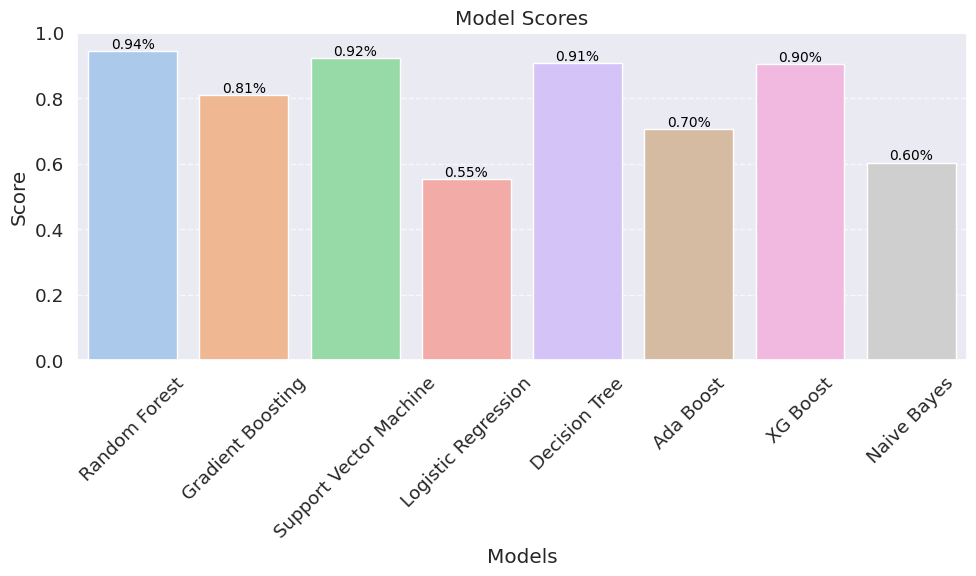

In [38]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(evaluations_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=evaluations_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
from joblib import dump

# Save the trained model
dump(best_model, 'Weather Model.joblib')

['Weather Model.joblib']

In [40]:
from joblib import load

# Load the saved model
loaded_model = load('Weather Model.joblib')

In [41]:
best_model

Pipeline(steps=[('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [42]:
import pickle

# Assuming 'model' is your trained Scikit-learn model
# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# To load the model back
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
